ライブラリのインポート

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

画像読み込み

In [5]:
img = cv2.imread("img/chainsaw.jpg")

In [6]:
img

array([[[ 14,  20, 249],
        [ 16,  22, 253],
        [ 37,  59, 241],
        ...,
        [136, 199, 155],
        [143, 201, 172],
        [155, 232, 158]],

       [[ 16,  27, 239],
        [ 65, 108, 225],
        [ 47,  81, 225],
        ...,
        [140, 200, 170],
        [142, 222, 133],
        [150, 221, 164]],

       [[ 52,  91, 220],
        [ 22,  38, 235],
        [ 37,  59, 238],
        ...,
        [141, 211, 158],
        [130, 162, 221],
        [165, 244, 163]],

       ...,

       [[ 42, 118,  46],
        [ 21, 117,  57],
        [  8, 123,  50],
        ...,
        [ 13,  19, 250],
        [  3,   7, 249],
        [ 12,  24, 248]],

       [[ 68,  59, 126],
        [ 26,  78, 108],
        [  0, 139,   9],
        ...,
        [ 16,  33, 238],
        [  8,  22, 234],
        [ 12,  24, 248]],

       [[ 70,  76,  81],
        [ 83,  88,  97],
        [ 76,  79,  94],
        ...,
        [  5,  17, 255],
        [  2,  22, 237],
        [ 12,  30, 253]]

画像データの各位置のカラーデータが配列で表示される。

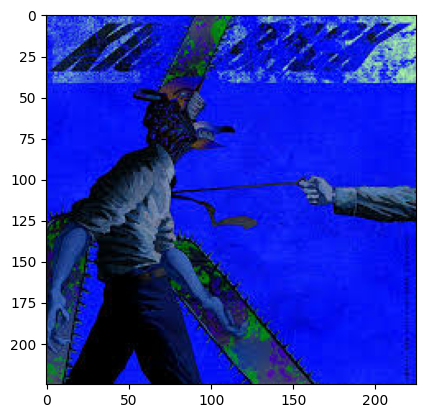

In [7]:
plt.imshow(img)

openCVのカラーデータはBGRのデータ配列であるのに対し、matplotlibのplt.imshow()はRGBで処理するため、青く表示されている。
これをRGBに変換してから表示させてみる。

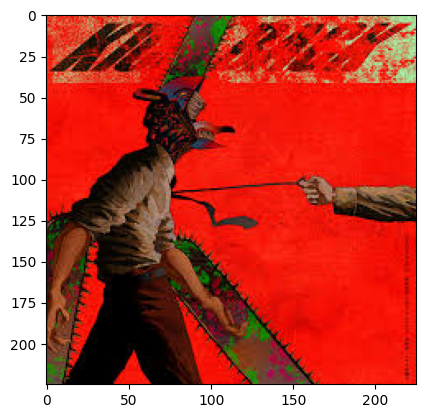

In [8]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

グレースケール化

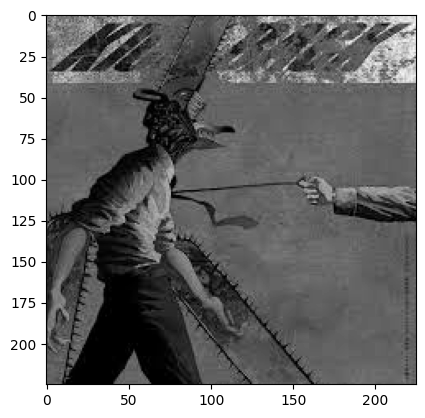

In [10]:
img_gray = cv2.imread("img/chainsaw.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(img_gray, cmap='gray')

画像サイズの変換   

In [11]:
img.shape

(225, 225, 3)

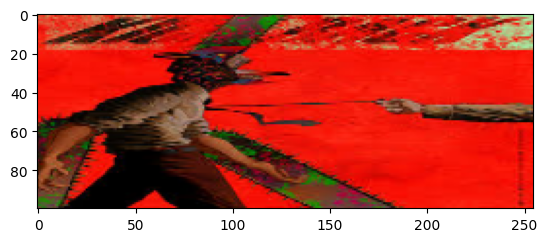

In [14]:
img = cv2.resize(img_rgb, (255,100))
plt.imshow(img)

指定の比率でリサイズ

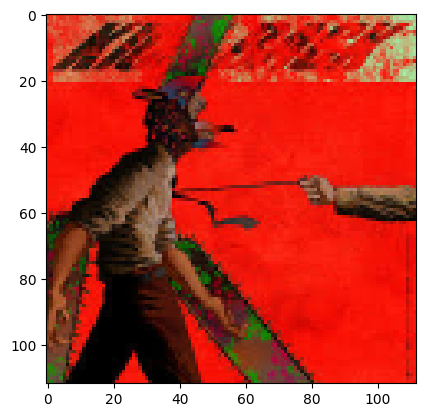

In [16]:
w_ratio = 0.5
h_ratio = 0.5

img_resize = cv2.resize(img_rgb,(0,0),img,w_ratio,h_ratio)
plt.imshow(img_resize)

画像の反転

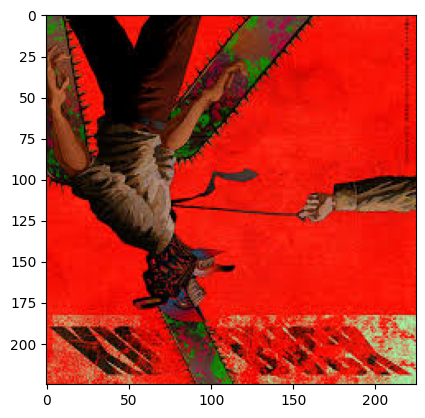

In [18]:
#x軸回転
img_xflip = cv2.flip(img_rgb,0)
plt.imshow(img_xflip)

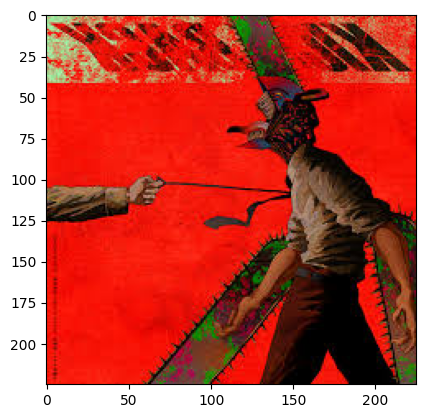

In [19]:
#y軸回転
img_yflip = cv2.flip(img_rgb,1)
plt.imshow(img_yflip)

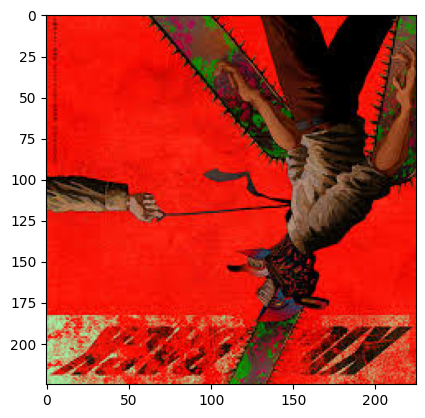

In [20]:
#xy軸回転
img_xyflip = cv2.flip(img_rgb,-1)
plt.imshow(img_xyflip)

画像の保存

In [22]:
cv2.imwrite('img/chainsaw_gray.jpg', img_gray)

True

画像表示サイズ調整

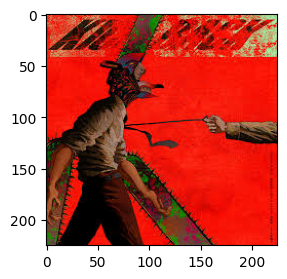

In [23]:
fig = plt.figure(figsize=(5,3))
ax = fig.add_subplot(111)
ax.imshow(img_rgb)

図形を描く

In [25]:
img_area = np.zeros(shape=(500,500,3),dtype=np.int16)

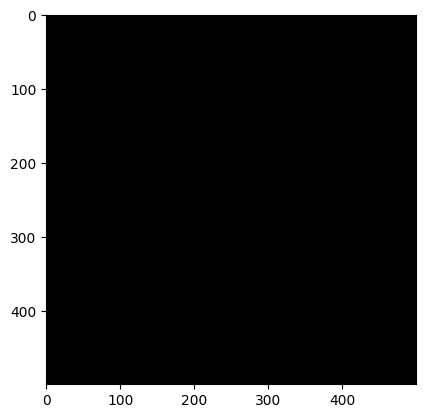

In [26]:
img_area.shape
plt.imshow(img_area)

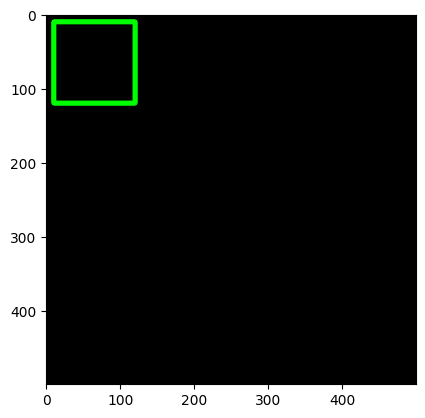

In [28]:
#矩形(pt1:左上、pt2:右下)
cv2.rectangle(img_area,pt1=(10,10),pt2=(120,120),color=(0,255,0),thickness=5)
plt.imshow(img_area)

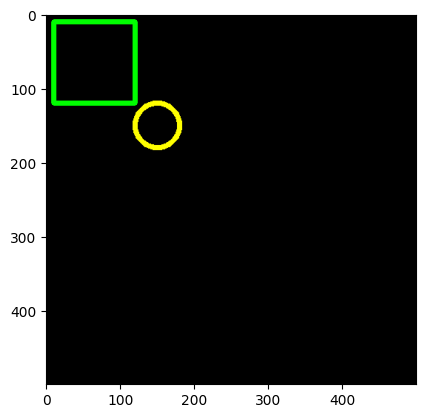

In [29]:
#円(center:中心、radius:半径)
cv2.circle(img_area,center=(150,150),radius=30,color=(255,255,0),thickness=5)
plt.imshow(img_area)

塗りつぶしはthickness=-1

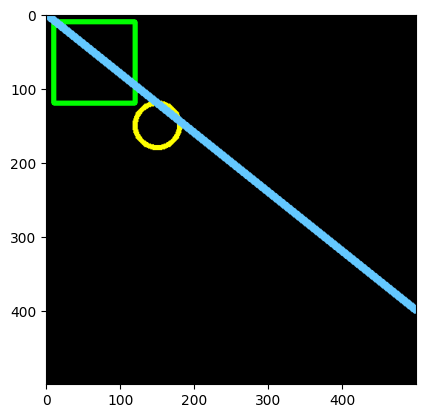

In [30]:
#直線
cv2.line(img_area,pt1=(0,0),pt2=(500,400),color=(100,200,255),thickness=10)
plt.imshow(img_area)

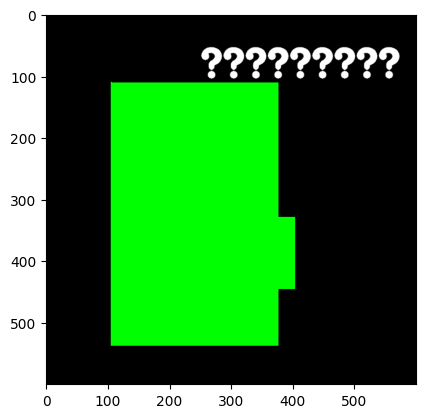

In [49]:
#文字(org:捩の左下)
font = cv2.FONT_HERSHEY_COMPLEX
cv2.putText(img_area,text="日本語は行けるの？",org=(250,100),fontFace=font,fontScale=2,color=(255,255,255),thickness=7,lineType=cv2.LINE_AA)
plt.imshow(img_area)

日本語は駄目でした

In [33]:
#多角形
vertex = np.array([[100,300],[200,400],[400,200],[500,440]],np.int32)
vertex.shape

(4, 2)

多角形の頂点データはROWSx1x2の形にならないといけないため、reshape()を使って変換。

In [34]:
pts = vertex.reshape((-1,1,2))
pts.shape

(4, 1, 2)

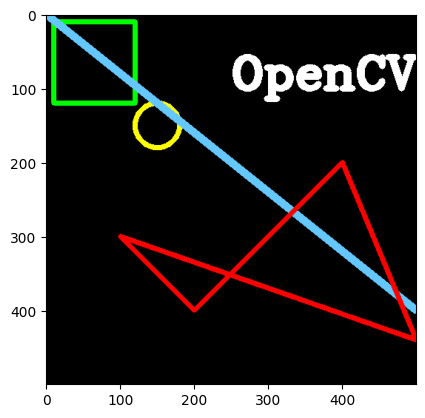

In [35]:
cv2.polylines(img_area, [pts], isClosed=True, color=(255,0,0), thickness=5)
plt.imshow(img_area)

マウスのクリックで円を描画

In [4]:
def draw_circle(event,x,y,falgs,param):
    if event == cv2.EVENT_LBUTTONDOWN:
        cv2.circle(img_area,(x,y),100,(255,255,255),-1)
    if event == cv2.EVENT_RBUTTONDOWN:
        cv2.circle(img_area,(x,y),10,(0,255,0),-1)

マウスを動かしている間矩形を描画

In [46]:
drawing = False
ix,iy = -1,-1

def draw_rectangle(event,x,y,flags,param):
    global ix,iy,drawing

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix,iy = x,y

    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            cv2.rectangle(img_area,(ix,iy),(x,y),(0,255,0),-1)

    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False

In [10]:
#描画実行
img_area = np.zeros((600,600,3),np.uint8)
cv2.namedWindow(winname="mouse_drawing")

cv2.setMouseCallback("mouse_drawing",draw_circle)#円
# cv2.setMouseCallback("mouse_drawing",draw_rectangle)#矩形

while True:
    cv2.imshow("mouse_drawing",img_area)
    if cv2.waitKey(20) & 0xFF == 27:
        break

cv2.destroyAllWindows()

In [11]:
cv2.imwrite("img/sample1.jpg", img_area)

True